## Bankruptcy Prediction through Ensemble Learning Algorithms

In [2]:
from scipy.io import arff

In [3]:
first_year = arff.loadarff('./dataset/1year.arff')
second_year = arff.loadarff('./dataset/2year.arff')
third_year = arff.loadarff('./dataset/3year.arff')
fourth_year = arff.loadarff('./dataset/4year.arff')
fifth_year = arff.loadarff('./dataset/5year.arff')

In [6]:
import pandas as pd

/usr/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [7]:
df_first_year = pd.DataFrame(first_year[0])
df_second_year = pd.DataFrame(second_year[0])
df_third_year = pd.DataFrame(third_year[0])
df_fourth_year = pd.DataFrame(fourth_year[0])
df_fifth_year = pd.DataFrame(fifth_year[0])

In [36]:
int(df_first_year.shape[0]) + \
int(df_second_year.shape[0]) + \
int(df_third_year.shape[0]) + \
int(df_fourth_year.shape[0]) + \
int(df_fifth_year.shape[0])

43405

In [32]:
df = pd.concat([df_first_year, df_second_year, df_third_year, df_fourth_year, df_fifth_year])

In [33]:
df.loc[:, df.columns != 'class']

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.200550,0.379510,0.396410,2.04720,3.235100e+01,0.388250,0.249760,1.330500,1.13890,0.504940,...,348690.0000,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.6580,4.415800,7.42770
1,0.209120,0.499880,0.472250,1.94470,1.478600e+01,0.000000,0.258340,0.996010,1.69960,0.497880,...,2304.6000,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.3500,3.400000,60.98700
2,0.248660,0.695920,0.267130,1.55480,-1.152300e+00,0.000000,0.309060,0.436950,1.30900,0.304080,...,6332.7000,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.2700,2.718500,5.20780
3,0.081483,0.307340,0.458790,2.49280,5.195200e+01,0.149880,0.092704,1.866100,1.05710,0.573530,...,20545.0000,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.4350,4.222800,5.54970
4,0.187320,0.613230,0.229600,1.40630,-7.312800e+00,0.187320,0.187320,0.630700,1.15590,0.386770,...,3186.6000,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.2100,2.869200,7.89800
5,0.228220,0.497940,0.359690,1.75020,-4.771700e+01,0.000000,0.281390,1.008300,1.97860,0.502060,...,7616.8000,0.139320,0.454570,0.85891,0.023002,3.4028,8.9949,88.4440,4.126900,12.29900
6,0.111090,0.647440,0.289710,1.47050,2.534900e+00,0.000000,0.111090,0.544540,1.73480,0.352560,...,1377.1000,0.605900,0.315100,0.40871,0.000000,6.3222,2.9098,129.5500,2.817300,18.35200
7,0.532320,0.027059,0.705540,53.95400,2.995800e+02,0.000000,0.652400,35.957000,0.65273,0.972940,...,12341.0000,0.086730,0.547130,0.49521,0.013194,9.1300,82.0500,7.4503,48.991000,2.32170
8,0.009020,0.632020,0.053735,1.12630,-3.784200e+01,0.000000,0.014434,0.582230,1.33320,0.367980,...,1.1263,0.180110,0.024512,0.84165,0.340940,9.9665,4.2382,116.5000,3.133000,2.56030
9,0.124080,0.838370,0.142040,1.16940,-9.188300e+01,0.000000,0.153280,0.192790,2.11560,0.161630,...,989.4100,0.079665,0.767680,0.92847,0.000000,3.3192,6.4994,144.6300,2.523600,107.67000


In [23]:
import numpy as np

In [37]:
labels = np.array(df['class'], np.int)

In [41]:
int(labels[labels == 1].shape[0]) / int(labels.shape[0]) * 100.00

4.81741734823177

In [42]:
int(labels[labels == 0].shape[0]) / int(labels.shape[0]) * 100.00

95.18258265176823

In [44]:
import seaborn as sns

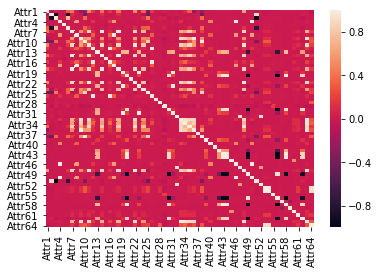

In [45]:
sns.heatmap(df.corr())

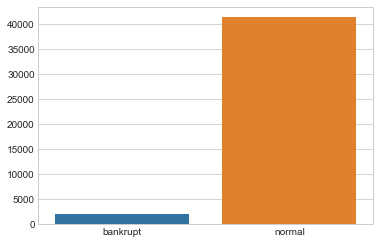

In [50]:
sns.set_style('whitegrid')
label_freq_dist = pd.DataFrame.from_dict({'normal': [int(labels[labels == 0].shape[0])],
                                          'bankrupt': [int(labels[labels == 1].shape[0])]})
sns.barplot(data=label_freq_dist)

In [74]:
df = df.dropna(axis=0, how='any')

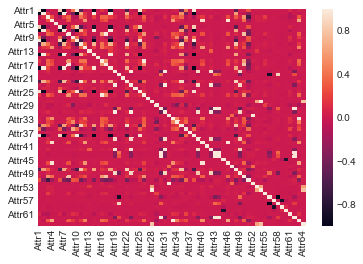

In [76]:
sns.heatmap(df.corr())

In [77]:
features = np.array(df.loc[:, df.columns != 'class'])

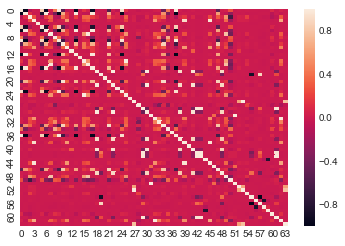

In [79]:
sns.heatmap(pd.DataFrame(features).corr())

In [80]:
labels = np.array(df['class'], np.int)

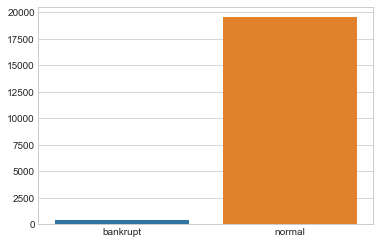

In [81]:
sns.set_style('whitegrid')
label_freq_dist = pd.DataFrame.from_dict({'normal': [int(labels[labels == 0].shape[0])],
                                          'bankrupt': [int(labels[labels == 1].shape[0])]})
sns.barplot(data=label_freq_dist)

In [82]:
int(labels[labels == 1].shape[0]) / int(labels.shape[0]) * 100.00

2.1635698903190264

In [83]:
int(labels[labels == 0].shape[0]) / int(labels.shape[0]) * 100.00

97.83643010968098